<a href="https://colab.research.google.com/github/1911521014SitiNina/Kel-4-APM/blob/main/ANN_SingleLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
np.random.seed(10)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

#read data
data = pd.read_csv('titanic (1).csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#encoding data to string
dict_live = {
    0 : 'Perished',
    1 : 'Survived'
}

#encoding data from string
dict_sex = {
    'male' : 0,
    'female' : 1
}

#apply dictionary
data['Bsex'] = data['Sex'].apply(lambda x : dict_sex[x]) #menerapkan data 

#set variable independent and dependent
features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

In [3]:
def sigmoid_act(x, der=False):  #mendefinisikan aktifator sigmoid
    import numpy as np  #import library numpy
    
    if(der==True) :  #jika sigmoid derivatif
        f = 1/(1 + np.exp(- x))*(1-1/(1 + np.exp(- x)))
    else :
        f = 1/(1 + np.exp(- x))
    return f

def ReLU_act(x, der = False):  #mendefinisikan ReLU
    import numpy as np  #import library numpy
    
    if(der == True):
        f= np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    return f

In [4]:
from sklearn.model_selection import train_test_split  #import modul train test split dari library sklearn
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.30)  #menambagi data train dan data test

print('Training records :',Y_train.size)  #menampilkan record data training
print('Test records :',Y_test.size)  #menampilkan record data test

Training records : 623
Test records : 268


In [5]:
#modelling

p = 4  #menentuka layer 1
q = 4  #menentukan layer 2

eta = 1/623  #menentukan learning rate

#menginisialisasi data yang relevant
w1 = 2*np.random.rand(p, X_train.shape[1]) - 0.5
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q, p) - 0.5
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5
bOut = np.random.rand(1)

#deklarasi array untuk loss function
mu = []
vec_y = []

#perulangan untuk "passeneger"
for I in range(0, X_train.shape[0]):
    x = X_train[I]  #input data
    
    z1 = ReLU_act(np.dot(w1, x) + b1)   #output layer 1
    z2 = ReLU_act(np.dot(w2, z1) + b2)  #output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut)
    
    delta_Out = (y-Y_train[I]) * sigmoid_act(y, der = True)  #memproses ouput error layer
    
    delta_2 = delta_Out * wOut * ReLU_act(z2, der = True)  #error pada layer 2
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der = True)  #error pada layer 1
    
    wOut = wOut - eta*delta_Out*z2
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q, p)
    b2 = b1 - eta*delta_1
    
    #memproses loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])
    
    print ("Iterasi ke-" + str(I), y, wOut, bOut,
          "Error : " + str(np.abs(np.sum(mu) / np.sum(vec_y))))

Iterasi ke-0 [0.99521598] [0.10522152 0.12713196 0.04045035 1.29996831] [0.96665943] Error : 0.4976079917832934
Iterasi ke-1 [0.98580938] [0.10523594 0.12715738 0.04046068 1.29997569] [0.96666394] Error : 0.2500362295496082
Iterasi ke-2 [0.96260576] [0.10451035 0.12581969 0.04024618 1.29962966] [0.96635494] Error : 0.3256634398169165
Iterasi ke-3 [0.99833963] [0.1025468  0.12237827 0.03989157 1.29881367] [0.96603963] Error : 0.3696054930551756
Iterasi ke-4 [0.98627157] [0.10256363 0.12240864 0.03989205 1.29882057] [0.96604399] Error : 0.29565678466011824
Iterasi ke-5 [0.96107014] [0.10183895 0.12107246 0.03967784 1.29847782] [0.96573528] Error : 0.3258268597520857
Iterasi ke-6 [0.96061683] [0.10111454 0.11973669 0.03946371 1.29813604] [0.96542664] Error : 0.34749096413722574
Iterasi ke-7 [0.9980955] [0.09915208 0.11629674 0.03910947 1.29733073] [0.96511138] Error : 0.36676564141162626
Iterasi ke-8 [0.9942101] [0.09916071 0.1163119  0.0391126  1.29733452] [0.96511321] Error : 0.32552885

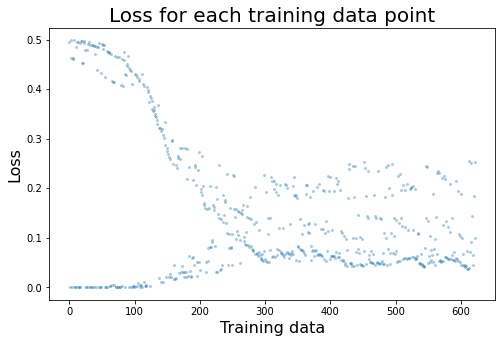

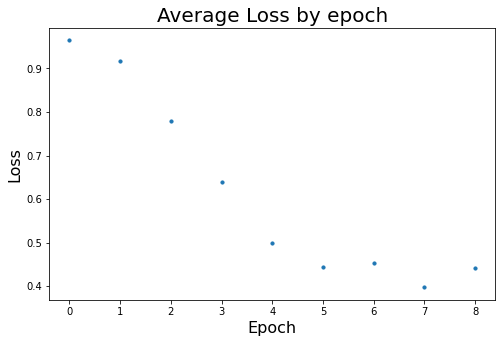

In [6]:
plt.figure(figsize = (8,5))  #membuat diagram plot untuk data train
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

pino = [] 
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)

plt.figure(figsize=(8,5))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Average Loss by epoch', fontsize = 20)  #membuat judul diagram
plt.xlabel('Epoch', fontsize=16)  #membuat label sb x
plt.ylabel('Loss', fontsize=16)  #membuat label sb y
plt.show()  #menampilkan plot

In [7]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):  #
    import numpy as np
    import matplotlib.pyplot as plt
    
    w1 = 2*np.random.rand(p, X_train.shape[1]) - 0.5
    b1 = np.random.rand(p)
    
    w2 = 2*np.random.rand(q, p) - 0.5
    b2 = np.random.rand(q)
    
    wOut = 2*np.random.rand(q) - 0.5
    bOut = np.random.rand(1)
    
    #array untuk loss function
    mu = []
    vec_y = []
    
    #perulangan untuk "passenger"
    for I in range(0, X_train.shape[0]-1):
        x = X_train[I]  #input data
        
        z1 = ReLU_act(np.dot(w1, x) + b1)  #output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2)   #output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)
        
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
        
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True)
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True)
        
        wOut = wOut - eta*delta_Out*z2
        bOut = bOut - eta*delta_Out
        
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p)
        b2 = b2 - eta*delta_2
        
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1

        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)          
    
    #menampilkan diagram plot
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, 
                alpha=1, s=10, label='error')
    plt.title('Average Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
                    
    return w1, b1, w2, b2, wOut, bOut, mu

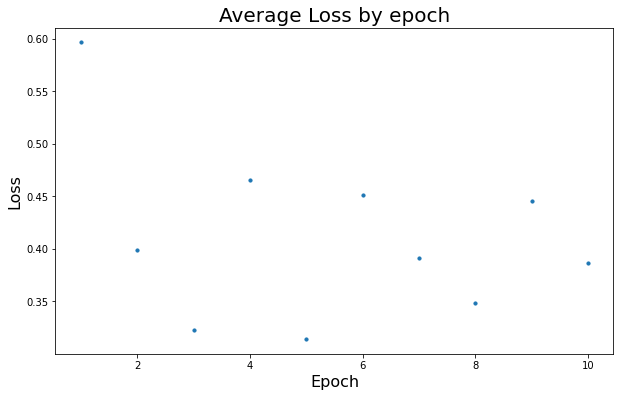

In [8]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015)

In [9]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]):
        x= X_test[I]
        
        z1 = ReLU_act(np.dot(w1, x) + b1)
        z2 = ReLU_act(np.dot(w2, z1) + b2)
        y = sigmoid_act(np.dot(wOut, z2) + bOut)
        
        pred.append(np.heaviside(y - 0.5, 1)[0])
    return np.array(pred);

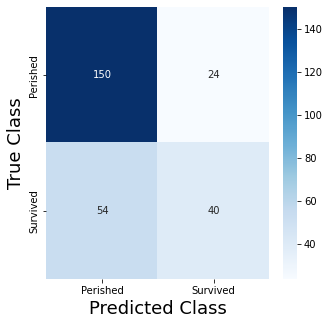

In [10]:
#plot confussion matrix dengan heatmap
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)],
                    columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

In [15]:
test_data = pd.read_csv('test.csv')
test_data.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [16]:
test_data['Bsex'] = test_data['Sex'].apply(lambda x : dict_sex[x])

X = test_data[['Pclass', 'Bsex']].to_numpy()

test_predictions = ANN_pred(X, w1, b1, w2, b2, wOut, bOut, mu)

In [17]:
#export file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})
submission.head(5)

submission.to_csv(r'submission.csv', index=False)
from IPython.display import FileLink
FileLink(r'submission.csv')  #membuat file csv baru

/content/submission.csv